## Nested box plots using Seaborn module functions

In [1]:
# Loading required libraries
%pylab inline
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns

Populating the interactive namespace from numpy and matplotlib


In [2]:
# Load the citibike data for October 2015
citibike = pd.read_csv("201510-citibike-tripdata.csv")

# Converting starttime into datetime format
citibike['starttime'] = pd.to_datetime(citibike['starttime'])

print type(citibike)
print citibike.info()

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1212277 entries, 0 to 1212276
Data columns (total 15 columns):
tripduration               1212277 non-null int64
starttime                  1212277 non-null datetime64[ns]
stoptime                   1212277 non-null object
start station id           1212277 non-null int64
start station name         1212277 non-null object
start station latitude     1212277 non-null float64
start station longitude    1212277 non-null float64
end station id             1212277 non-null int64
end station name           1212277 non-null object
end station latitude       1212277 non-null float64
end station longitude      1212277 non-null float64
bikeid                     1212277 non-null int64
usertype                   1212277 non-null object
birth year                 1065765 non-null float64
gender                     1212277 non-null int64
dtypes: datetime64[ns](1), float64(5), int64(5), object(4)
memory usage: 148

In [3]:
# Extracting weekday from starttime variable
dayOfWeek={0:'Monday', 1:'Tuesday', 2:'Wednesday', 3:'Thursday', 4:'Friday', 5:'Saturday', 6:'Sunday'}
citibike['weekday'] = citibike['starttime'].dt.dayofweek.map(dayOfWeek)

# Giving descriptions to the gender labels
genderDesc={1:'Male', 2:'Female'}
citibike['sex'] = citibike['gender'].map(genderDesc)

# Subset only for male and female values
citibike_subset = citibike[citibike['gender']>0]

print type(citibike_subset)
print citibike_subset.info()
print citibike_subset.head()

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1063889 entries, 0 to 1212276
Data columns (total 17 columns):
tripduration               1063889 non-null int64
starttime                  1063889 non-null datetime64[ns]
stoptime                   1063889 non-null object
start station id           1063889 non-null int64
start station name         1063889 non-null object
start station latitude     1063889 non-null float64
start station longitude    1063889 non-null float64
end station id             1063889 non-null int64
end station name           1063889 non-null object
end station latitude       1063889 non-null float64
end station longitude      1063889 non-null float64
bikeid                     1063889 non-null int64
usertype                   1063889 non-null object
birth year                 1063888 non-null float64
gender                     1063889 non-null int64
weekday                    1063889 non-null object
sex                      

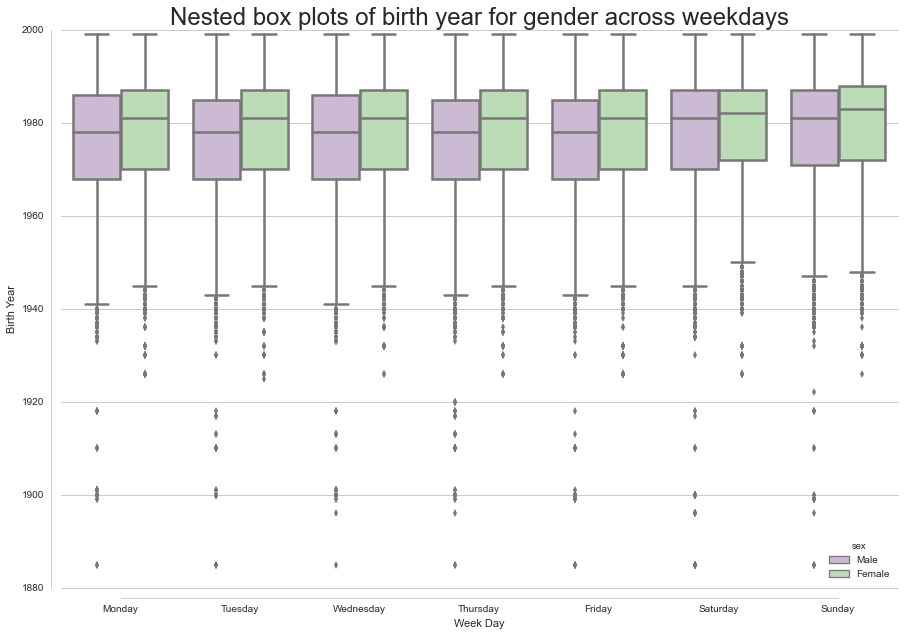

In [6]:
# Plotting nested box plots of birth year for gender categories across weekdays
plt.figure(figsize=(15,10))
sns.set_style("whitegrid")
days=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
ax = sns.boxplot(x="weekday", y="birth year", order=days, hue="sex", data=citibike_subset, palette="PRGn", linewidth=2.5)
sns.despine(offset=10, trim=True)
sns.set(font_scale=2)
ax.set(xlabel='Week Day', ylabel='Birth Year', title='Nested box plots of birth year for gender across weekdays')